In [4]:
import pandas as pd
import numpy as np
import importlib
import warnings
import zipfile

import make_data

importlib.reload(make_data)
warnings.filterwarnings("ignore")

In [5]:
zf = zipfile.ZipFile('../Data/all_season.zip')

bat = pd.read_csv(zf.open('all_season/all_season_batting_card.csv'))
bowl = pd.read_csv(zf.open("all_season/all_season_bowling_card.csv"))
full = pd.read_csv(zf.open("all_season/all_season_details.csv"))

df = make_data.make_data(bat, bowl, full)
df.head()

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,current_innings,runs,ball,venue,...,avg_noballs,total_overs,total_maidens,total_conceded,total_wickets,total_dots,total_fours_c,total_sixes_c,total_wides,total_noballs
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,RCB,2,6,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
16,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,RCB,0,2,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
32,2008,335982,Cameron White,Ajit Agarkar,RCB,KKR,RCB,3,6,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
48,2011,501223,David Hussey,Ajit Agarkar,DC,KXIP,KXIP,4,2,"Arun Jaitley Stadium, Delhi",...,0.047619,130.2,0,1151,29,273,113,41,36,2
62,2008,335982,Jacques Kallis,Ajit Agarkar,RCB,KKR,RCB,7,4,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2


<AxesSubplot:>

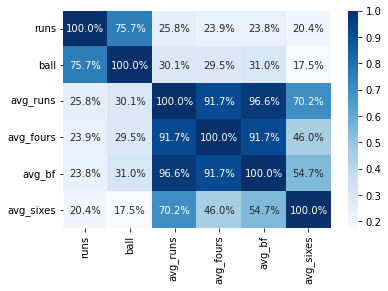

In [6]:
corr_matrix = df.corr()
runs_corr = corr_matrix["runs"].sort_values(ascending = False).reset_index()
runs_corr = runs_corr.loc[0:5, :]
top_five = runs_corr["index"].tolist()
sns.heatmap(corr_matrix.loc[top_five, top_five], annot = True, cmap = "Blues", fmt = ".1%")

In [7]:
bat.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,3.0,1.0,118.51,False,False,"{'wickets': 1, 'runs': 61}",8.1,c Shivam Mavi b Narine,"<strong>dances down, and slices to long-off!</...",NaN
1,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,7.0,3.0,145.76,False,False,"{'wickets': 3, 'runs': 192}",19.6,c Iyer b Shivam Mavi,he's holed out to long-on! <B> Won't get the o...,NaN
2,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,0.0,3.0,206.66,False,False,"{'wickets': 2, 'runs': 124}",13.3,lbw b Narine,<strong>big appeal for lbw and given by umpire...,NaN
3,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,2.0,3.0,185.00,False,True,{},NaN,not out,NaN,NaN
4,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,KKR,2,...,6.0,0.0,118.60,False,False,"{'wickets': 4, 'runs': 108}",13.2,lbw b Chahar,<strong>brain fade or what?</strong> Gill is s...,NaN


In [9]:
full

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2021,1254117,CSK v KKR,CSK,KKR,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"goes pretty full on middle, as Gaikwad pushes ...",<p>Around the wicket.</p><p>du Plessis comes o...,NaN
1,120,2021,1254117,CSK v KKR,CSK,KKR,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,pretty full and a touch wide of off. Bunted ba...,"<p>Stays around the stumps to du Plessis too, ...",NaN
2,130,2021,1254117,CSK v KKR,CSK,KKR,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"clips this good length ball on middle, which i...",NaN,NaN
3,140,2021,1254117,CSK v KKR,CSK,KKR,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,<strong>swept to deep square leg for the first...,NaN,NaN
4,150,2021,1254117,CSK v KKR,CSK,KKR,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"this skids on off a good legthh on middle, and...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207165,219020,2008,336040,CSK v RR,CSK,RR,RR,2,20,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,lovely! Balaji's bowled a yorker outside off s...,NaN,NaN
207166,219030,2008,336040,CSK v RR,CSK,RR,RR,2,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne steps down the track and throws his bat ...,NaN,<p>6 off 3 balls.</p>
207167,219050,2008,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne reaches out for a full ball and squeezes...,NaN,<p>Three to win off two balls.</p>
207168,219040,2008,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,what has he done! Balaji has bowled a wide out...,<p>Rajasthan need two runs a ball. Balaji from...,NaN


In [8]:
total_home_runs = df.groupby("home_team")["runs"].sum()
total_away_runs = df.groupby("away_team")["runs"].sum()

curr_teams = ["CSK", "MI", "DC", "SRH", "RCB", "RR", "KKR", "PBKS"]

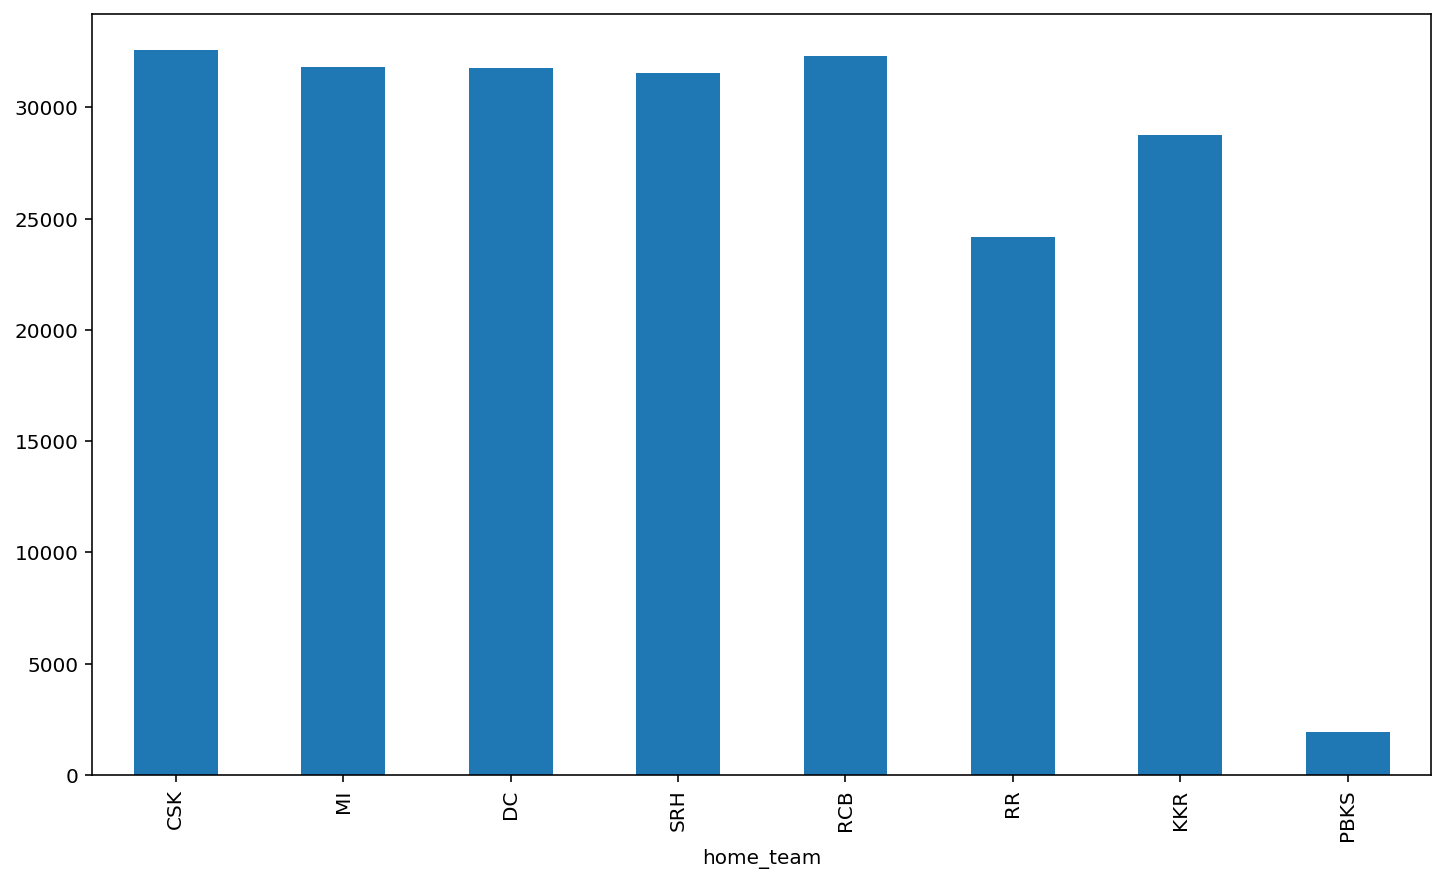

In [11]:
total_home_runs[curr_teams].plot(kind = "bar")

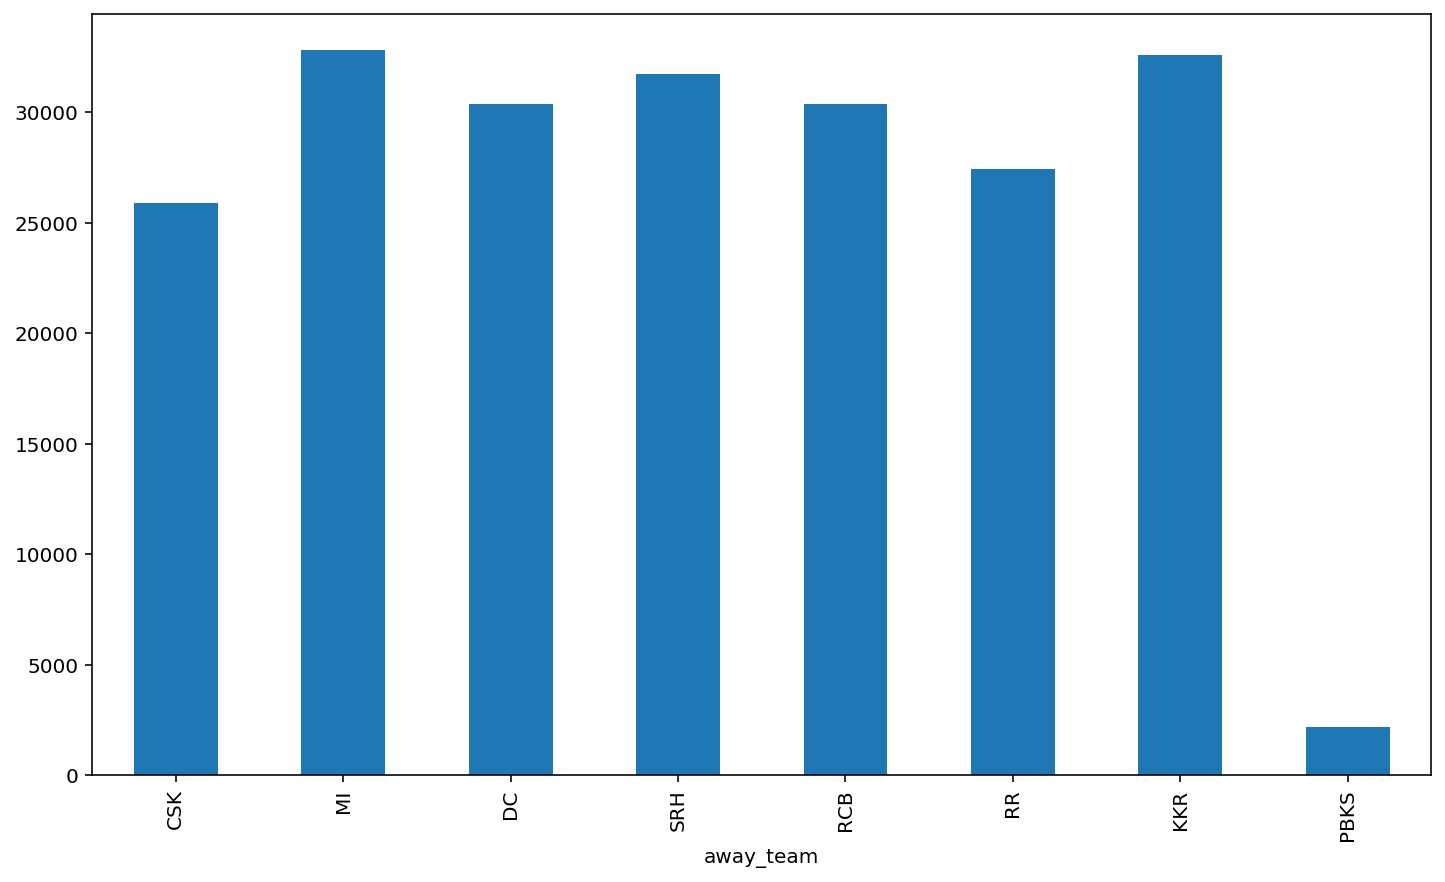

In [12]:
total_away_runs[curr_teams].plot(kind = "bar")

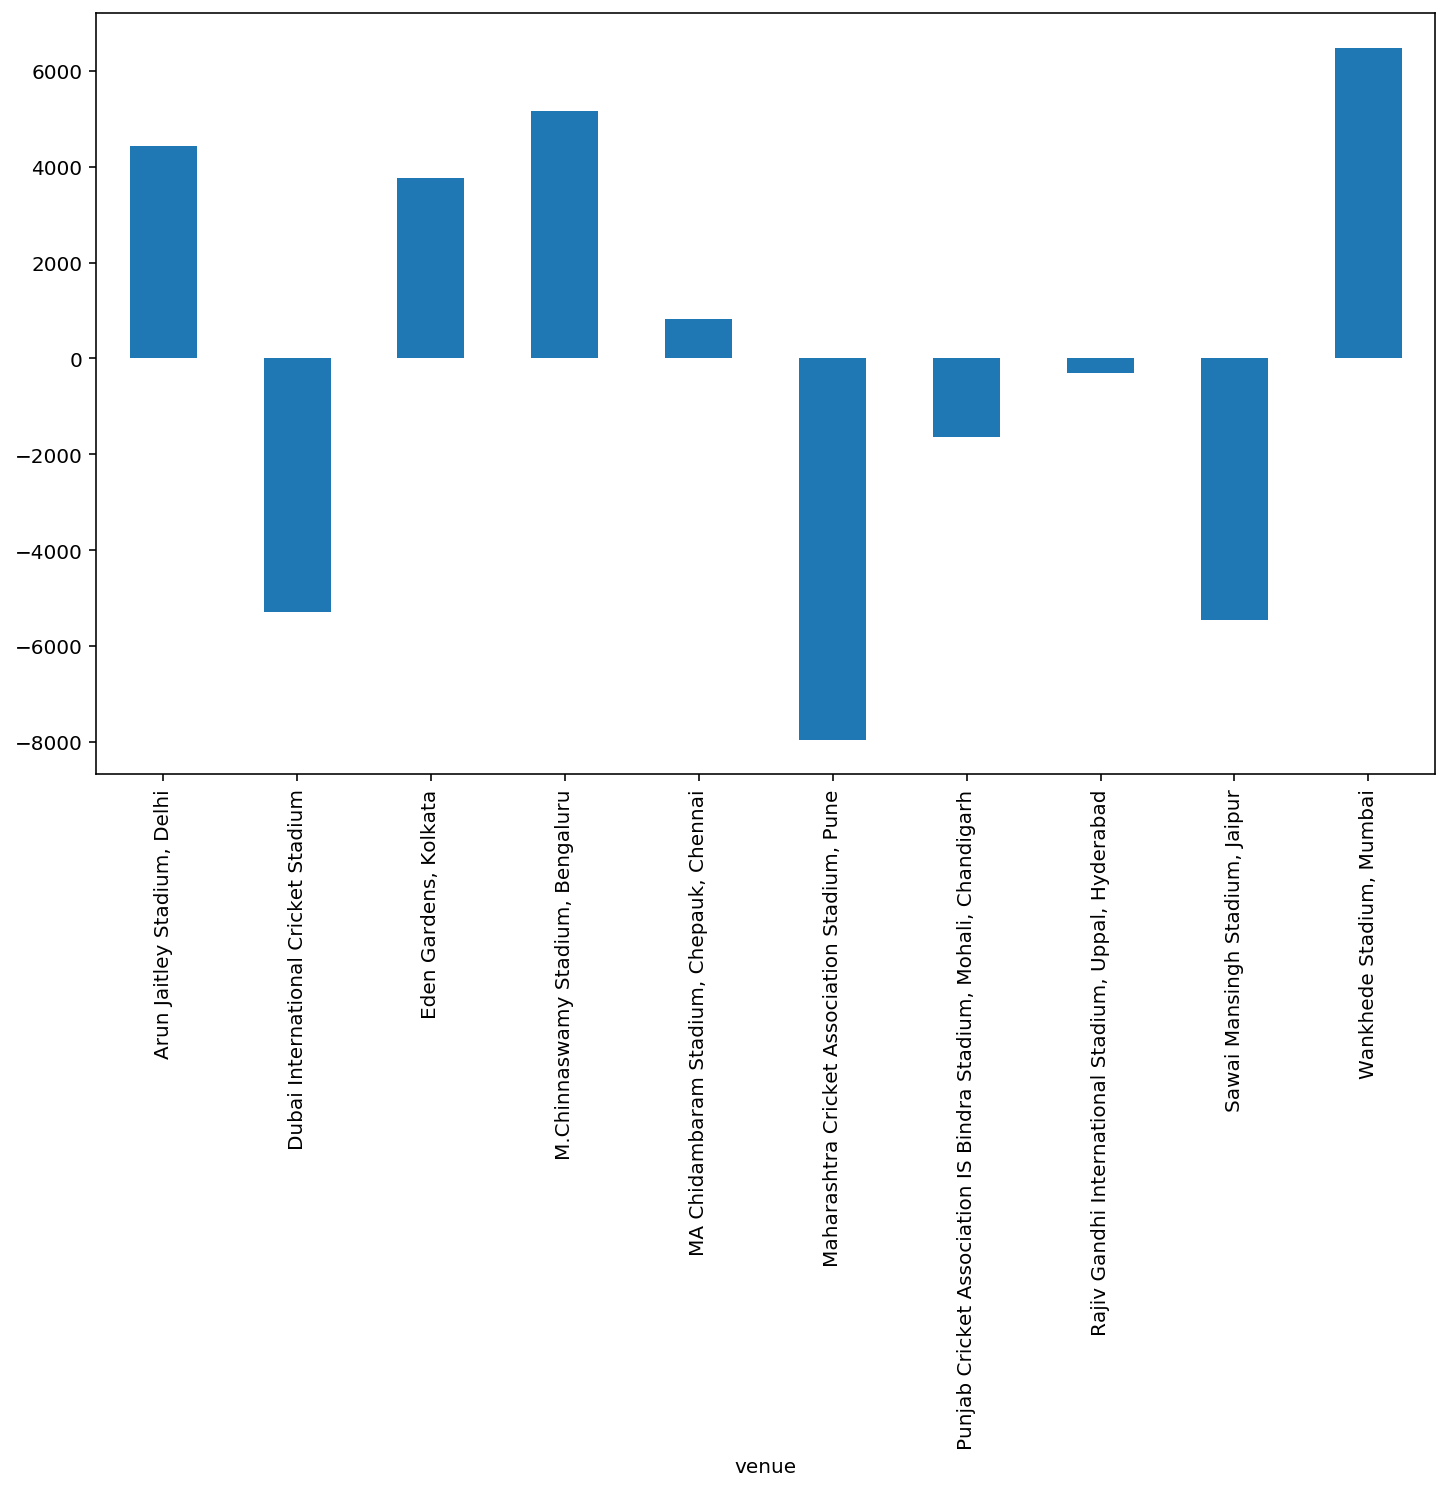

In [13]:
top_stadiums = df.groupby("venue").size().sort_values(ascending = False)[0:10].index.tolist()
ts = df[df["venue"].isin(top_stadiums)]

mean_runs_by_venue = ts.groupby("venue")["runs"].sum()
mean_runs_by_venue = mean_runs_by_venue - (mean_runs_by_venue.mean())
mean_runs_by_venue.plot(kind = "bar")

In [5]:
corr_matrix.loc[top_five, top_five]

,runs,ball,avg_runs,avg_fours,avg_bf,avg_sixes
runs,1.000000,0.757104,0.258444,0.239287,0.237983,0.204236
ball,0.757104,1.000000,0.301006,0.294864,0.310276,0.174829
avg_runs,0.258444,0.301006,1.000000,0.916644,0.965561,0.702383
avg_fours,0.239287,0.294864,0.916644,1.000000,0.917454,0.460319
avg_bf,0.237983,0.310276,0.965561,0.917454,1.000000,0.547113
avg_sixes,0.204236,0.174829,0.702383,0.460319,0.547113,1.000000


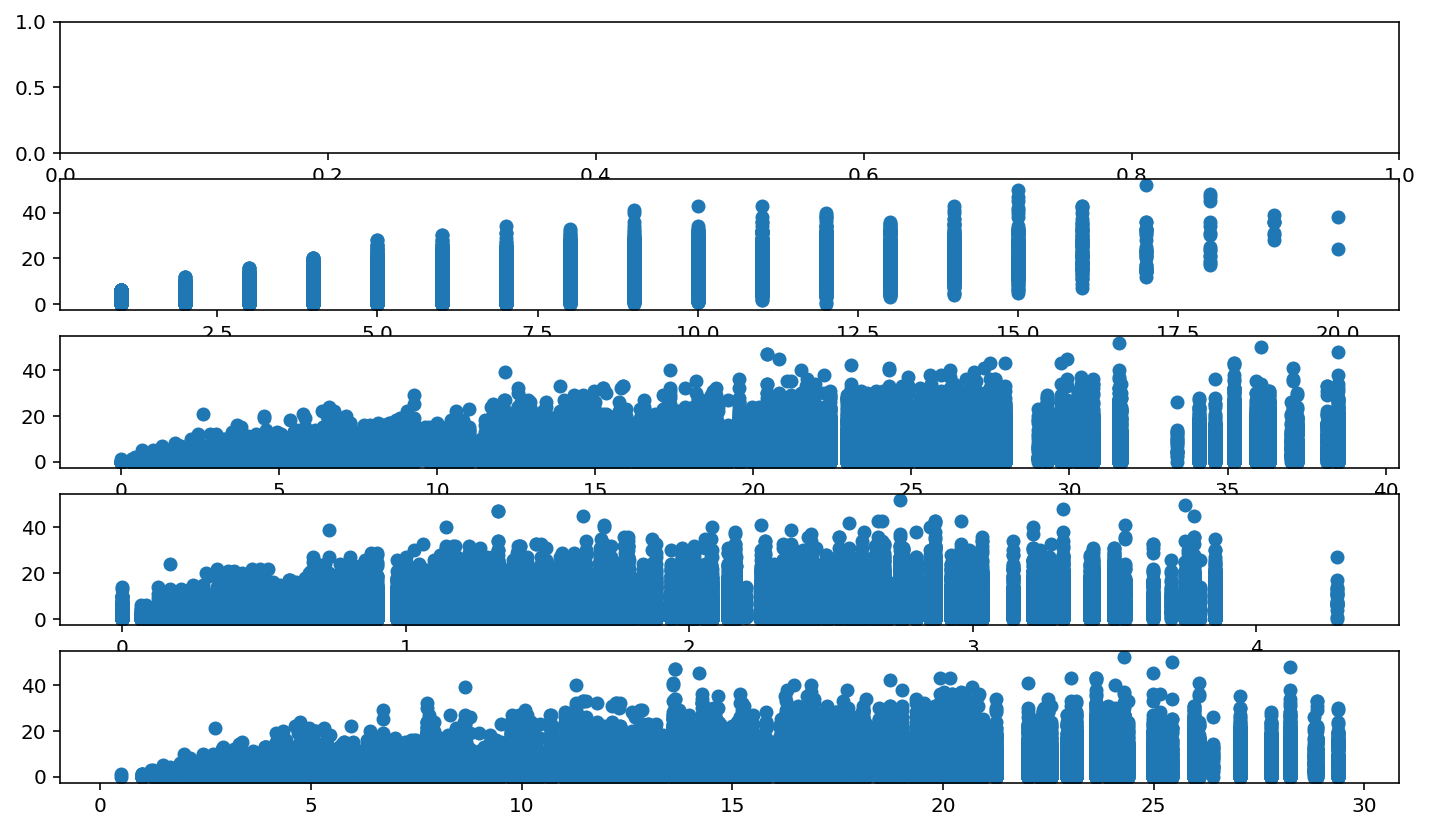

In [11]:
fig, ax = plt.subplots(5)
for i in range(1, 5, 1):
    ax[i].scatter(x = df[top_five[i]], y = df["runs"])

plt.show()